In [4]:
import numpy as np
import pandas as pd 
# 读取数据
data = pd.read_csv('bank-additional-full.csv',sep=';')
# 查看表的行列数
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [7]:
data.drop('nr.employed',axis=1,inplace=True)

Text(0.5, 1.0, '各年龄段的人数')

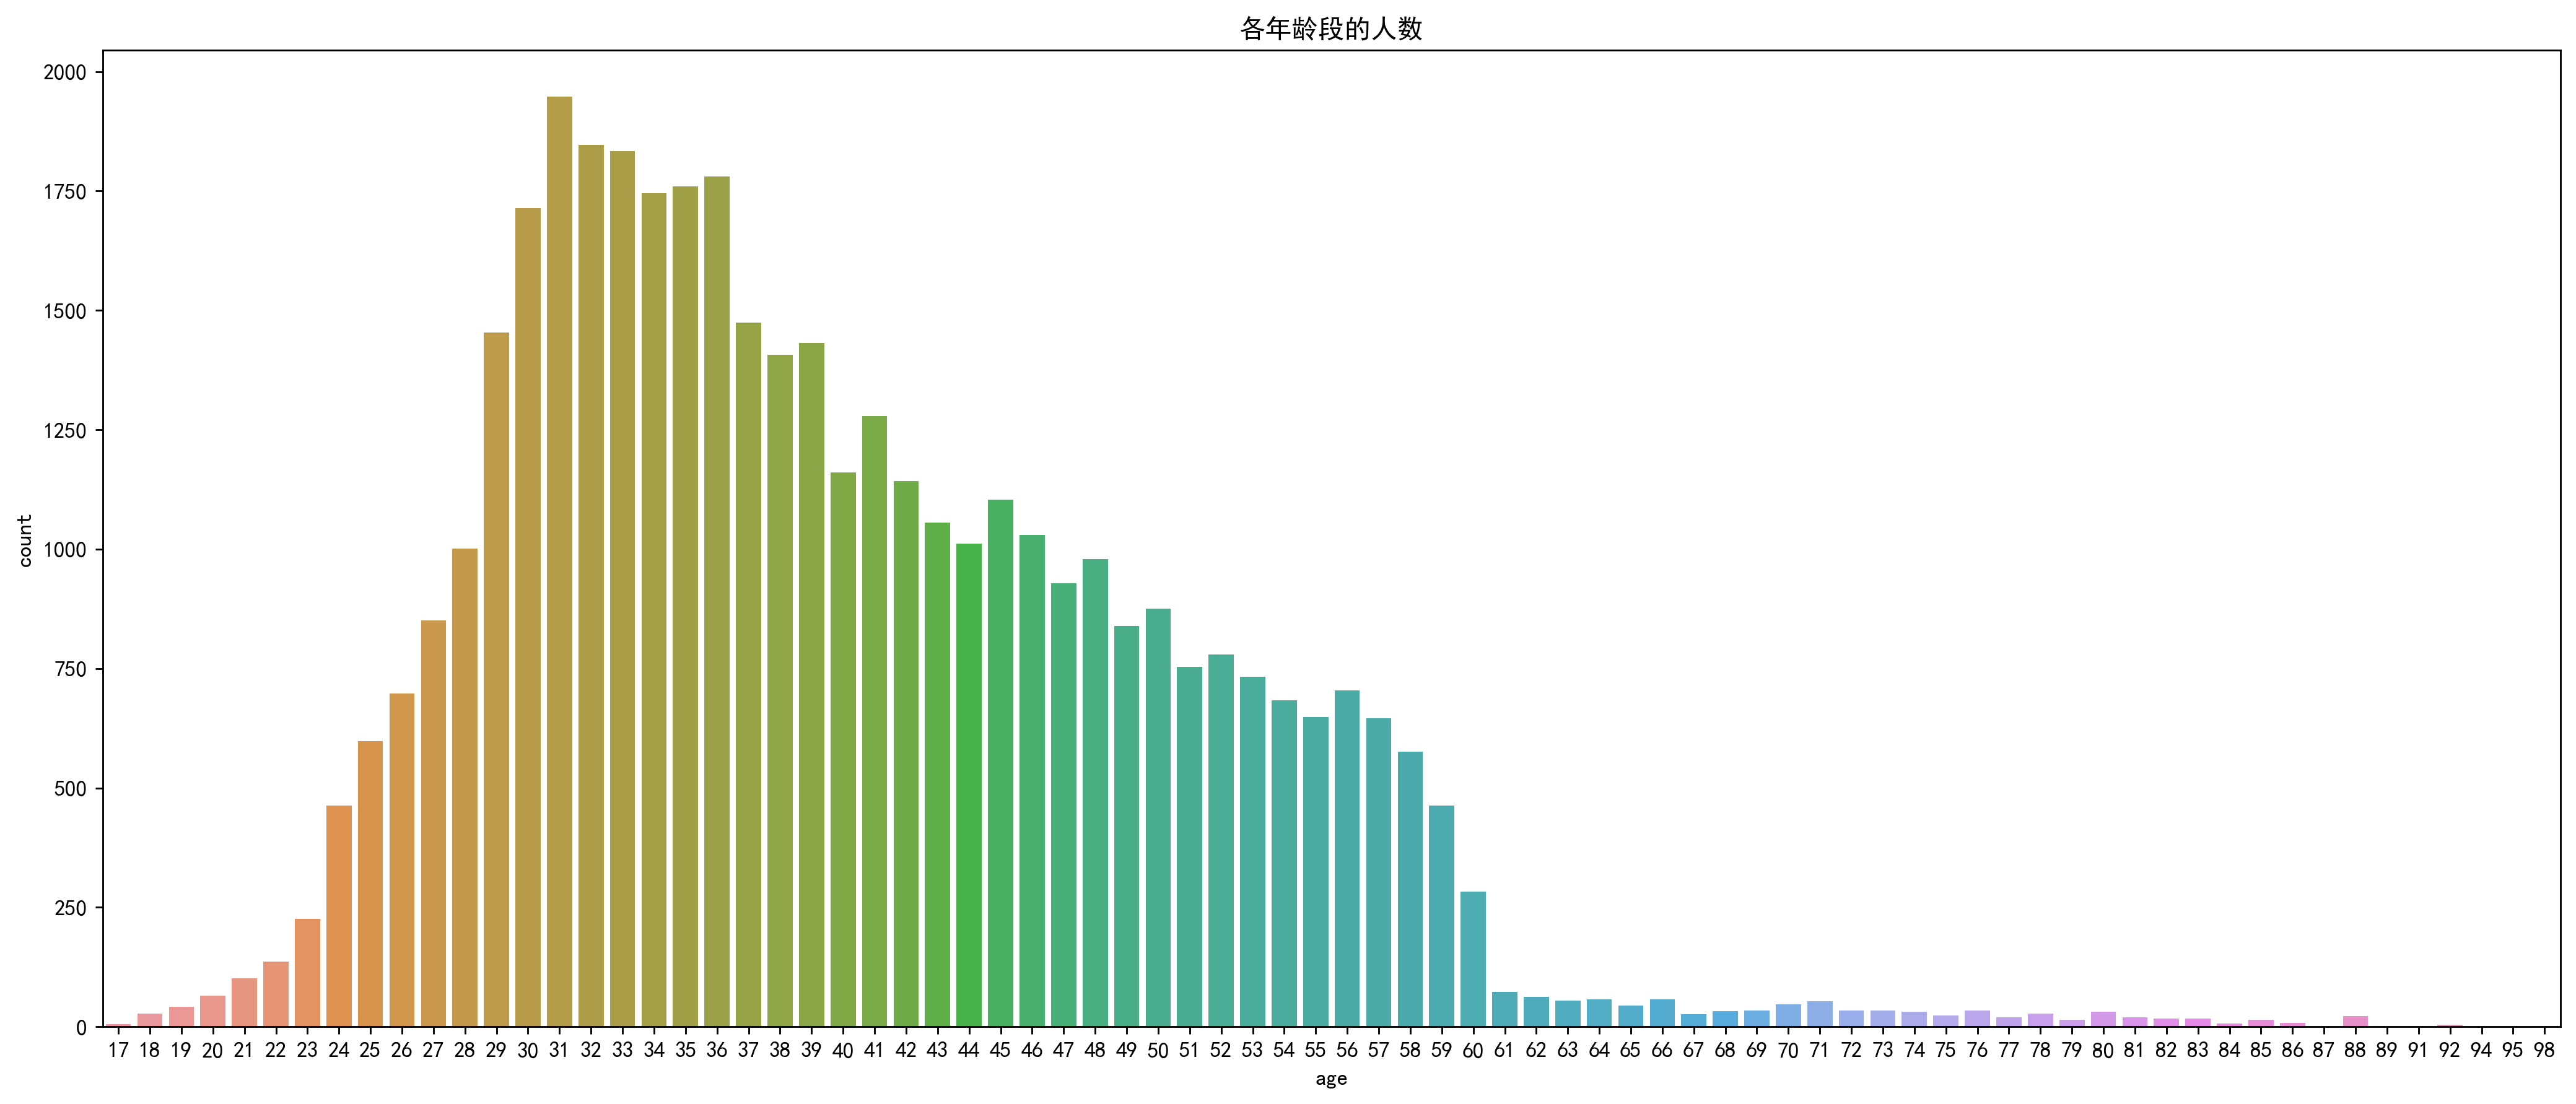

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(20, 8), dpi=256)
sns.countplot(x='age', data=data)
plt.title("各年龄段的人数")

In [9]:
#其他一些特征分布
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='contact', data=data)
plt.title("contact分布情况")

plt.subplot(222)
sns.countplot(x='day_of_week', data=data)
plt.title("day_of_week分布情况")

plt.subplot(223)
sns.countplot(x='default', data=data)
plt.title("default分布情况")

plt.subplot(224)
sns.countplot(x='education', data=data)
plt.xticks(rotation=70)
plt.title("education分布情况")

plt.savefig('./1.png')

In [10]:
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='housing', data=data)
plt.title("housing分布情况")

plt.subplot(222)
sns.countplot(x='job', data=data)
plt.xticks(rotation=70)
plt.title("job分布情况")

plt.subplot(223)
sns.countplot(x='loan', data=data)
plt.title("loan分布情况")

plt.subplot(224)
sns.countplot(x='marital', data=data)
plt.xticks(rotation=70)
plt.title("marital分布情况")

plt.savefig('./2.png')

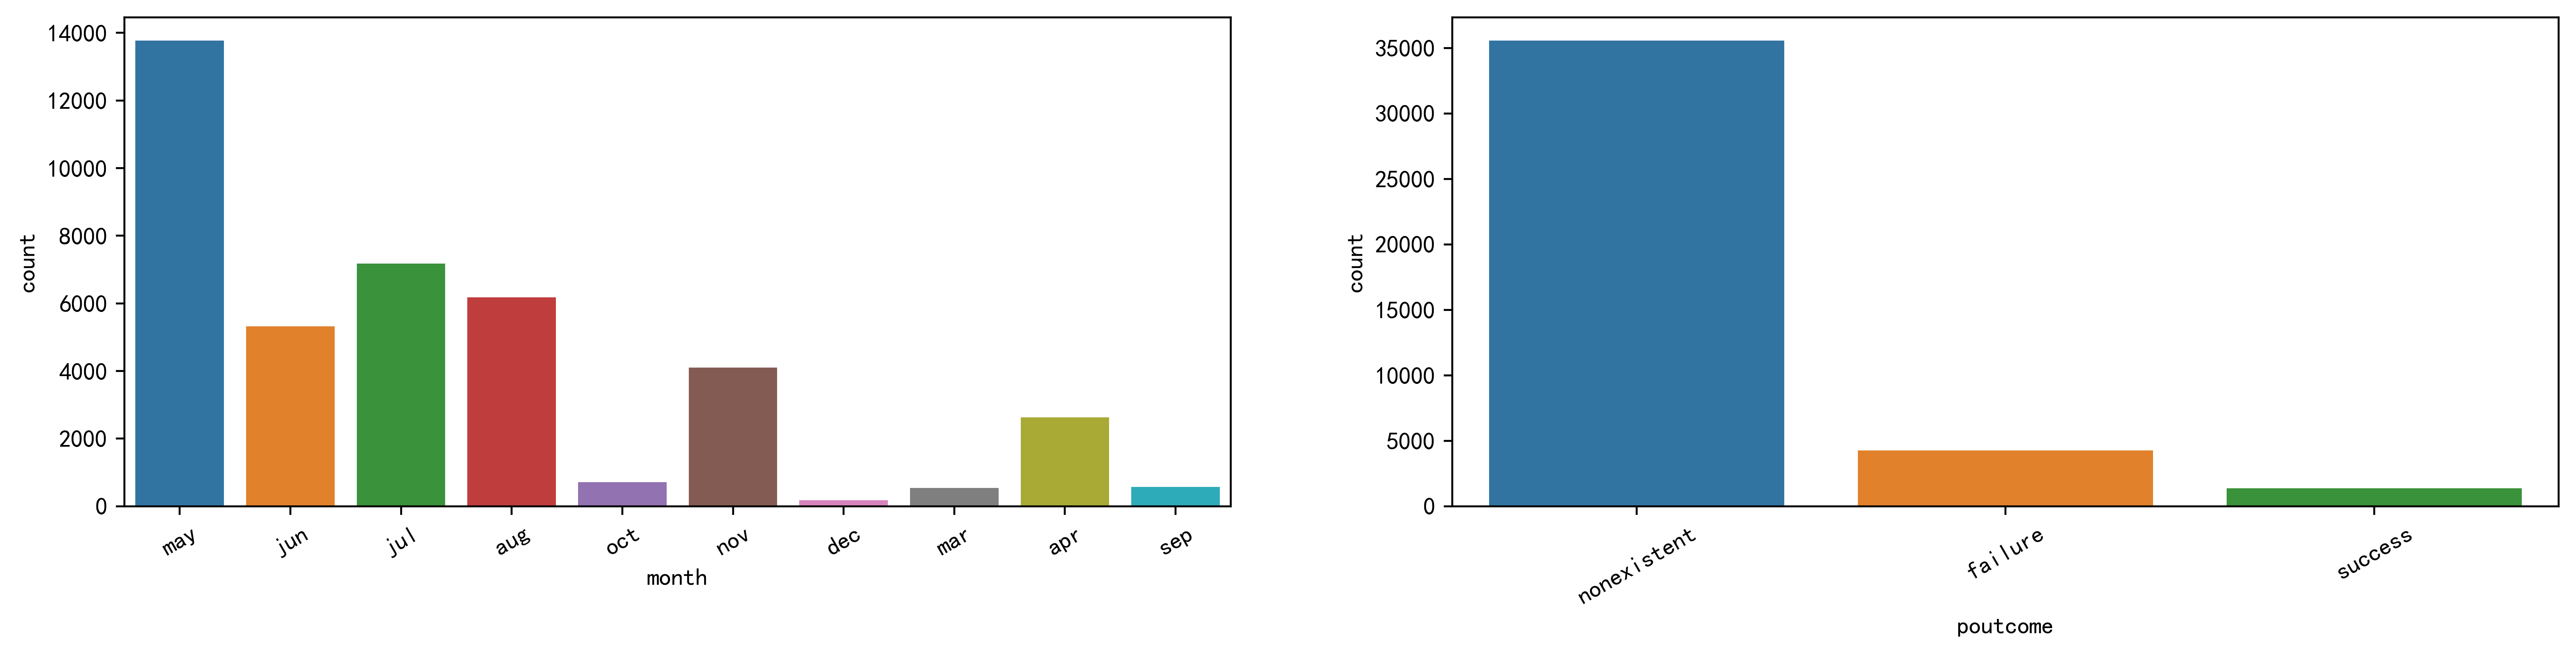

In [11]:
plt.figure(figsize=(18, 8), dpi=512)
plt.subplot(221)
sns.countplot(x='month', data=data)
plt.xticks(rotation=30)

plt.subplot(222)
sns.countplot(x='poutcome', data=data)
plt.xticks(rotation=30)
plt.savefig('./3.png')

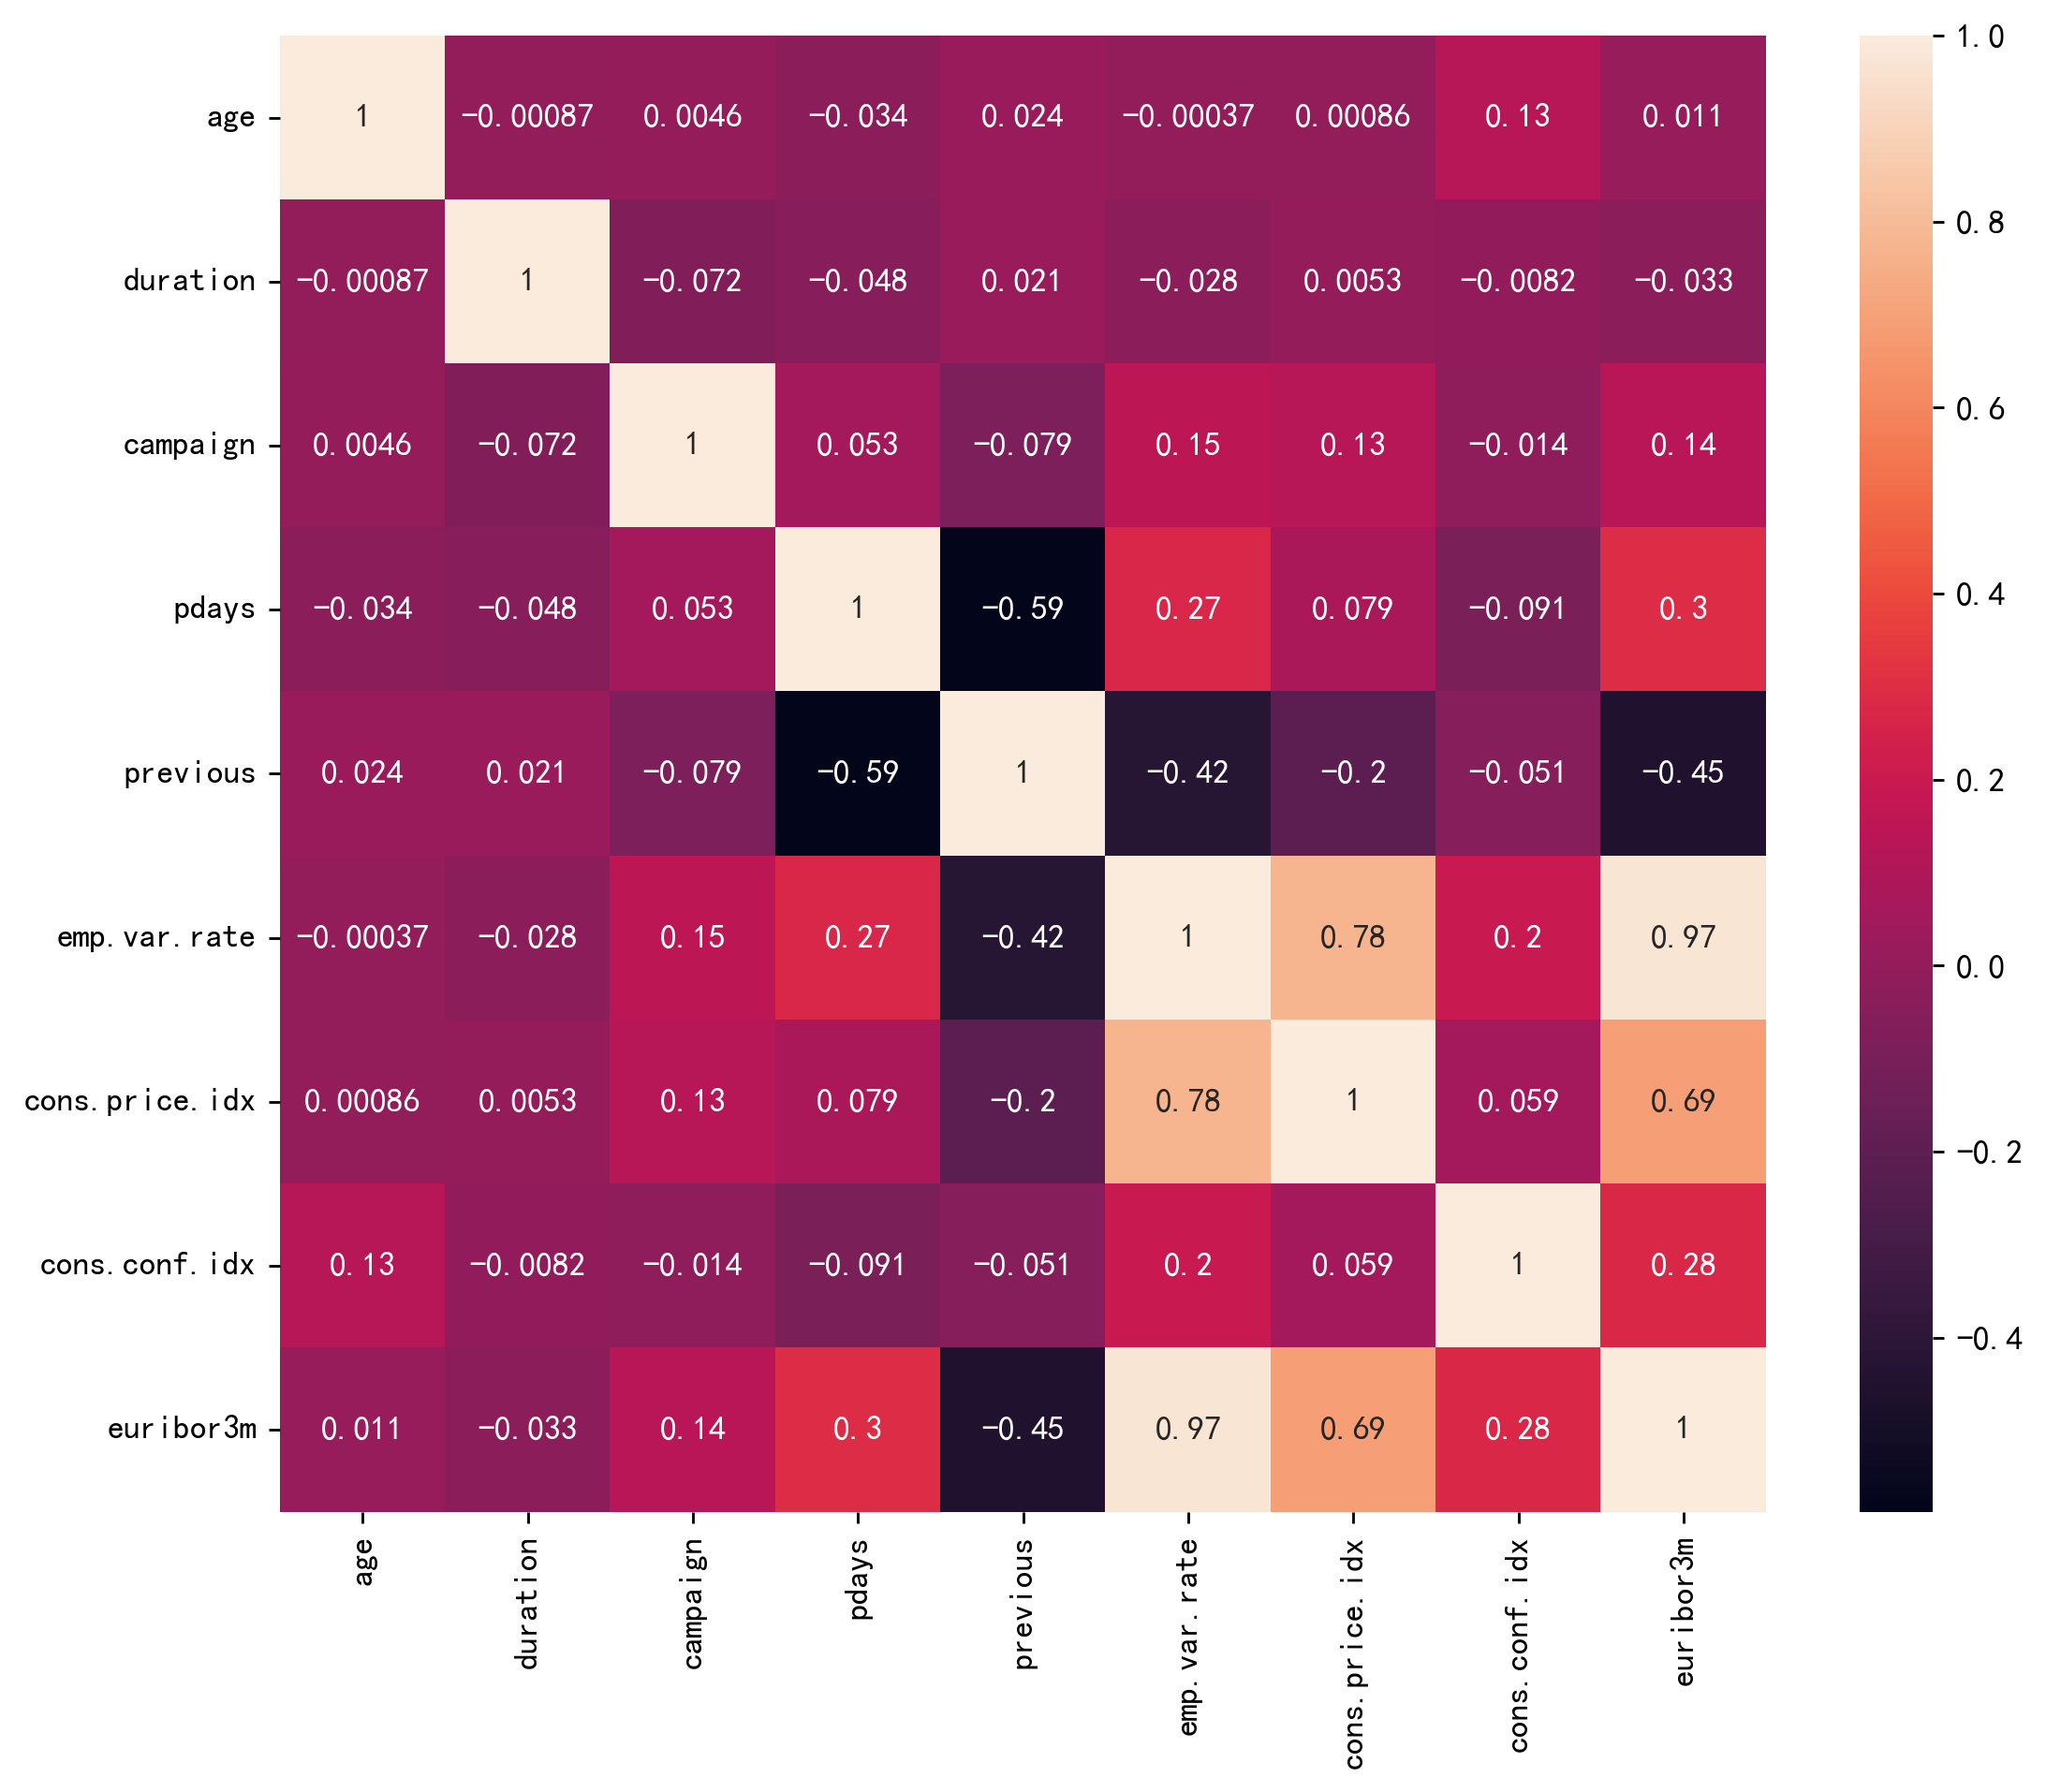

In [12]:
plt.figure(figsize=(10, 8), dpi=256)
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data.corr(), annot=True)
plt.savefig('./4.png')

In [13]:
#将自变量的特征值转换成标签类型
# 特征化数据
from sklearn.preprocessing import LabelEncoder
features = ['contact', 'day_of_week', 'default', 'education', 'housing',          
           'job','loan', 'marital', 'month', 'poutcome']
           
le_x = LabelEncoder()
for feature in features:   
    data[feature] = le_x.fit_transform(data[feature]) 


In [14]:
#将结果y值转换成0、1
def parse_y(x):   
    if (x == 'no'):     
        return 0   
    else:    
        return 1
data['y'] = data['y'].apply(parse_y)
data['y'] = data['y'].astype(int)

In [15]:
# 数据规范化
# 数据规范化到正态分布的数据
# 测试数据和训练数据的分割
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
train_x, test_x, train_y, test_y = train_test_split(data.iloc[:,:-1],                                                   
                                                    data['y'],                                                   
                                                    test_size=0.3)
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [16]:
#AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier()
ada.fit(train_x, train_y)
predict_y = ada.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.9139758841142672


In [17]:
#SVC分类器
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)
predict_y = svc.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.913814032532168


In [18]:
#K邻近值分类器
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.9057214534272072


In [19]:
#决策树分类器
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
predict_y = dtc.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))


准确率： 0.8943918426802622


Text(0.5, 1.0, 'AdaBoost分类器的ROC曲线')

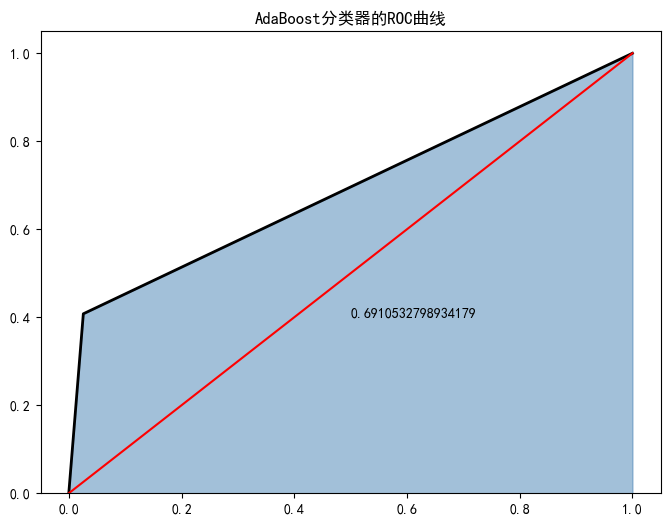

In [20]:
#模型评价
#AdaBoost分类器
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plt.figure(figsize=(8,6))
fpr1, tpr1, threshoulds1 = roc_curve(test_y, ada.predict(test_x))
plt.stackplot(fpr1, tpr1,color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr1, tpr1, linewidth=2, color='black')
plt.plot([0,1], [0,1], ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr1, tpr1))
plt.title('AdaBoost分类器的ROC曲线')

Text(0.5, 1.0, 'SVD的ROC曲线')

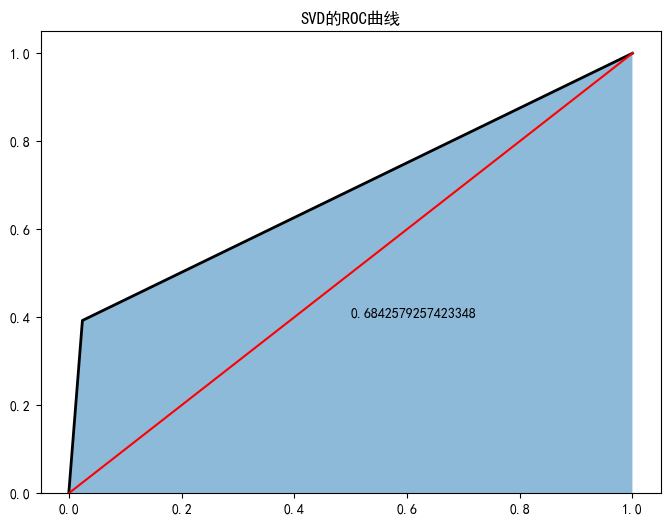

In [21]:
#SVC分类器
plt.figure(figsize=(8,6))
fpr2, tpr2, threshoulds2 = roc_curve(test_y, svc.predict(test_x))
plt.stackplot(fpr2, tpr2, alpha = 0.5)
plt.plot(fpr2, tpr2, linewidth=2, color='black')
plt.plot([0,1], [0,1],ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr2, tpr2))
plt.title('SVD的ROC曲线')

Text(0.5, 1.0, 'K邻近值的ROC曲线')

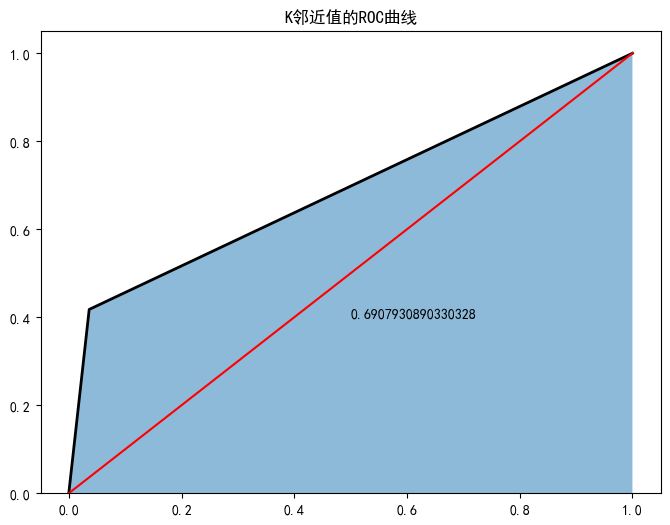

In [22]:
#K邻近值分类器
plt.figure(figsize=(8,6))
fpr3, tpr3, threshoulds3 = roc_curve(test_y, knn.predict(test_x))
plt.stackplot(fpr3, tpr3, alpha = 0.5)
plt.plot(fpr3, tpr3, linewidth=2, color='black')
plt.plot([0,1], [0,1],ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr3, tpr3))
plt.title('K邻近值的ROC曲线')

Text(0.5, 1.0, '决策树的ROC曲线')

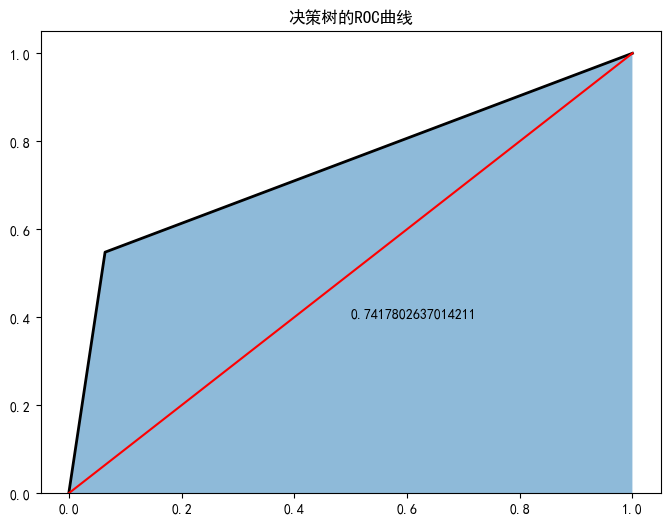

In [23]:
#决策树分类器
plt.figure(figsize=(8,6))
fpr4, tpr4, threshoulds4 = roc_curve(test_y, dtc.predict(test_x))
plt.stackplot(fpr4, tpr4, alpha = 0.5)
plt.plot(fpr4, tpr4, linewidth=2, color='black')
plt.plot([0,1], [0,1],ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr4, tpr4))
plt.title('决策树的ROC曲线')